### 1) Loading the Breast Cancer Dataset
- Import Libraries: Import pandas for handling data and load_breast_cancer to get the breast cancer dataset.
- Load Dataset: breast_cancer = load_breast_cancer() loads the dataset.
- Create DataFrame: df is created to hold the data in a table-like structure with columns named after the features.
- Add Target Column: df['target'] adds a column for the target labels (i.e., whether the tumor is benign or malignant).
- Display Data: print(df.head()) shows the first few rows of the dataset so you can see what it looks like.

In [37]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the dataset
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target

# Display the first few rows
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

### 2) Performing Descriptive Statistics
- Mean: Average value of each feature (e.g., average tumor size).
- Median: Middle value when the data is sorted (e.g., middle tumor size).
- Mode: Most frequent value. .iloc[0] selects the first mode in case there are multiple.
- Standard Deviation: Measures how spread out the values are from the mean (e.g., how different the tumor sizes are from the average size).
- Variance: The square of the standard deviation, showing how much the data varies.
- Range: Difference between the maximum and minimum values (e.g., the difference between the largest and smallest tumor size).
- Skewness: Measures the asymmetry of the data distribution (e.g., whether the data is more spread out to the left or right of the mean).
- Kurtosis: Measures the "tailedness" of the data distribution (e.g., how heavy or light the tails of the distribution are).

In [38]:
# Calculate basic descriptive statistics
print("Mean:\n", df.mean())
print("\nMedian:\n", df.median())
print("\nMode:\n", df.mode().iloc[0])
print("\nStandard Deviation:\n", df.std())
print("\nVariance:\n", df.var())

# Additional descriptive statistics
print("\nRange:\n", df.max() - df.min())
print("\nSkewness:\n", df.skew())
print("\nKurtosis:\n", df.kurt())


Mean:
 mean radius                 14.127292
mean texture                19.289649
mean perimeter              91.969033
mean area                  654.889104
mean smoothness              0.096360
mean compactness             0.104341
mean concavity               0.088799
mean concave points          0.048919
mean symmetry                0.181162
mean fractal dimension       0.062798
radius error                 0.405172
texture error                1.216853
perimeter error              2.866059
area error                  40.337079
smoothness error             0.007041
compactness error            0.025478
concavity error              0.031894
concave points error         0.011796
symmetry error               0.020542
fractal dimension error      0.003795
worst radius                16.269190
worst texture               25.677223
worst perimeter            107.261213
worst area                 880.583128
worst smoothness             0.132369
worst compactness            0.254265
worst

### 3) Performing Inferential Statistics or Hypothesis test
- Import Libraries: Import scipy.stats for performing statistical tests.
- Select Feature: Choose the 'mean radius' feature from the dataset (e.g., the average size of the tumor's radius).
- Hypothetical Mean: Set a value (e.g., 14.0) to compare against.
- One-Sample T-Test: Test if the sample mean of 'mean radius' is different from 14.0. The T-statistic tells us how much the sample mean deviates from the hypothetical mean, and the p-value shows the probability that this deviation is due to chance.

In [39]:
from scipy import stats
import pandas as pd

# Select the feature of interest, for example, 'mean radius'
feature_values = df['mean radius']

# Hypothetical population mean to compare against
hypothetical_mean = 14.0  # This is an example value; you can change it as needed

# Perform a one-sample t-test
t_stat, p_value = stats.ttest_1samp(feature_values, hypothetical_mean)

# Print the results
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpretation
alpha = 0.05  # Significance level (commonly used value)

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


T-Statistic: 0.8616173566232037
P-Value: 0.3892617071079777
Fail to reject the null hypothesis.


### 4) Confidence Intervals
- Import Libraries: Import numpy and scipy for calculations.
- Sample Mean & Standard Error: Calculate the average ('sample_mean') and the standard error (which shows how much the sample mean might differ from the true mean).
- Confidence Interval: Calculate a range where you are 95% confident that the true mean lies within this interval. This gives a sense of the uncertainty around the sample mean.

In [40]:
import numpy as np
import pandas as pd

# Sample mean and standard error for the selected feature (mean radius)
sample_mean = np.mean(mean_radius_values)
standard_error = stats.sem(mean_radius_values)

# Compute the 95% confidence interval for the mean radius
confidence_interval = stats.norm.interval(0.95, loc=sample_mean, scale=standard_error)

print("95% Confidence Interval for Mean Radius:", confidence_interval)


95% Confidence Interval for Mean Radius: (13.837734868964587, 14.416848610824518)


### 5) Regression Analysis
- Import Libraries: Import statsmodels for performing regression analysis.
- Prepare Data: X is the independent variable (e.g., 'mean radius') with a constant added for the intercept. y is the dependent variable (i.e., the target variable indicating if the tumor is benign or malignant).
- Fit Model: Perform linear regression to model the relationship between the independent and dependent variables.
- Print Summary: Show details about the model, including how well it fits the data and the significance of the relationships.

In [41]:
import statsmodels.api as sm
import pandas as pd

# Define independent variable (add constant for intercept)
X = sm.add_constant(df['mean radius'])  # You can replace 'mean radius' with any other feature from the Breast Cancer dataset

# Define dependent variable (e.g., target variable in the Breast Cancer dataset)
y = breast_cancer.target

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     647.0
Date:                Thu, 05 Sep 2024   Prob (F-statistic):           8.47e-96
Time:                        00:43:10   Log-Likelihood:                -177.28
No. Observations:                 569   AIC:                             358.6
Df Residuals:                     567   BIC:                             367.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.0436      0.057     35.615      

### 6) Interpreting Regression Model Results: Coefficients, P-Values, and R-Squared
- Import Libraries: Load necessary libraries for data handling and modeling.
- Extract Coefficients: Get values showing the impact of each feature.
- Extract P-Values: Get values indicating the statistical significance of each feature.
- Extract R-Squared: Get the measure of how well the model fits the data.
- Print Results: Display the coefficients, p-values, and R-squared value.
- Interpret P-Values: Coefficients with p-values < 0.05 are considered significant.
- Interpret R-Squared: Indicates the percentage of variability explained by the model.

In [42]:
import statsmodels.api as sm
import pandas as pd

# Extracting specific values
coefficients = model.params
p_values = model.pvalues
r_squared = model.rsquared

# Interpretation
print("\nInterpretation")
print("Coefficients:")
print(coefficients)
print("\nP-Values:")
print(p_values)
print("\nR-Squared:")
print("R-Squared: ", r_squared)

# Basic interpretation of p-values
print("\nInterpretation of P-Values:")
print("If the p-value is less than 0.05, the coefficient is considered statistically significant. Otherwise, it is not.")

# R-Squared interpretation
print("\nR-Squared:", round(r_squared, 2))
print("The model explains", round(r_squared * 100, 2), "% of the variability in the target variable.")



Interpretation
Coefficients:
const          2.043629
mean radius   -0.100247
dtype: float64

P-Values:
const          9.460301e-147
mean radius     8.465941e-96
dtype: float64

R-Squared:
R-Squared:  0.532941627421065

Interpretation of P-Values:
If the p-value is less than 0.05, the coefficient is considered statistically significant. Otherwise, it is not.

R-Squared: 0.53
The model explains 53.29 % of the variability in the target variable.


### 7) Visualizing the Relationship Between Mean Radius and Tumor Classification with Regression Line
- Define Variables: Sets up the independent variable (mean radius) and dependent variable (target).
- Fit the Model: Performs linear regression to get the regression line.
- Create Predictions: Adds the predicted values from the model to the DataFrame.
- Plot: Uses seaborn to create a scatter plot of actual data points and a line plot of the regression line.
- This visualization will clearly show how the mean radius of the tumors relates to the target variable (benign/malignant) and how well the regression model fits the data.

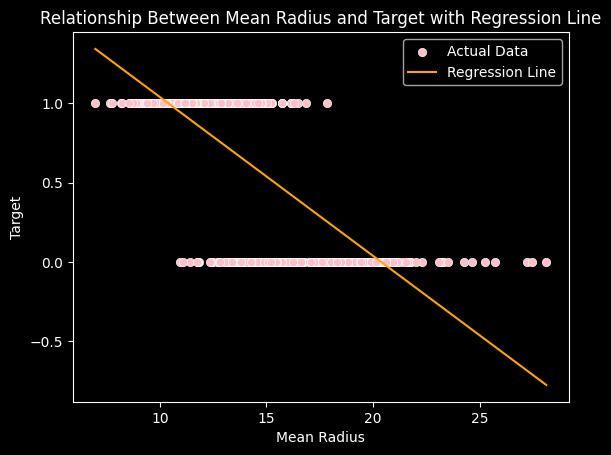

In [43]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the independent variable and dependent variable
X = sm.add_constant(df['mean radius'])  # Adding constant for intercept
y = breast_cancer.target

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Create a DataFrame for predictions
df['predicted'] = model.predict(X)

# Plot the scatter plot and regression line
sns.scatterplot(x=df['mean radius'], y=y, label='Actual Data', color='pink')
sns.lineplot(x=df['mean radius'], y=df['predicted'], label='Regression Line', color='orange')
plt.xlabel('Mean Radius')
plt.ylabel('Target')
plt.title('Relationship Between Mean Radius and Target with Regression Line')
plt.style.use("dark_background")
plt.legend()
plt.show()
